In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# make sure prints only print the first 3 decimals
np.set_printoptions(precision=3)

# a) 

In [40]:
A_a = np.array([
    [1, 10, 10**2, 10**3],
    [1, 25, 25**2, 25**3],
    [1, 40, 40**2, 40**3],
    [1, 55, 55**2, 55**3],
    [1, 70, 70**2, 70**3],
    [1, 90, 90**2, 90**3],
    [1, 105, 105**2, 105**3],
    [1, 120, 120**2, 120**3]
])

y_a = np.array([
    [2.2],
    [1.5],
    [0.83],
    [0.81],
    [0.78],
    [0.75],
    [0.87],
    [0.99]
])

In [54]:
# Solve the least squares problem
x_estimated_a = np.linalg.lstsq(A_a, y_a, rcond=None)
coefficients_a = x_estimated_a[0]
print(coefficients_a)

[[ 2.916e+00]
 [-8.002e-02]
 [ 9.149e-04]
 [-3.195e-06]]


# b)

In [112]:
B_b = np.array([
    [1, 10, 10**2, 10**3],
    [1, 25, 25**2, 25**3],
    [1, 40, 40**2, 40**3],
    [1, 55, 55**2, 55**3],
    [1, 70, 70**2, 70**3],
    [1, 90, 90**2, 90**3],
    [1, 105, 105**2, 105**3],
    [1, 120, 120**2, 120**3]
])

y_b = np.array([
    [2.2],
    [3.75],
    [3.32],
    [4.455],
    [5.46],
    [6.75],
    [9.135],
    [11.88]
])

In [113]:
# Solve the least squares problem
x_estimated_b = np.linalg.lstsq(B_b, y_b, rcond=None)
coefficients_b = x_estimated_b[0]
print(coefficients_b)

[[ 1.572e+00]
 [ 9.128e-02]
 [-1.280e-03]
 [ 1.032e-05]]


# c)

In [115]:
def polynomial_function_a(coefficients, velocity):
    return coefficients[0] + coefficients[1] * velocity + coefficients[2] * velocity**2 + coefficients[3] * velocity**3

def polynomial_function_b(coefficients, velocity):
    estimate = coefficients[0] + coefficients[1] * velocity + coefficients[2] * velocity**2 + coefficients[3] * velocity**3
    
    return estimate / velocity * 10

In [116]:
# Define the vectors for velocity and fuel consumption
original_velocity = np.array([10, 25, 40, 55, 70, 90, 105, 120])
original_fuel = np.array([2.2, 1.5, 0.83, 0.81, 0.78, 0.75, 0.87, 0.99])

In [117]:
# Generate a range of velocities for plotting the polynomial lines
velocity_range = np.linspace(10, 140, 500)

# Calculate the fuel consumption for each polynomial
fuel_consumption_a = polynomial_function_a(coefficients_a, velocity_range)
fuel_consumption_b = polynomial_function_b(coefficients_b, velocity_range)

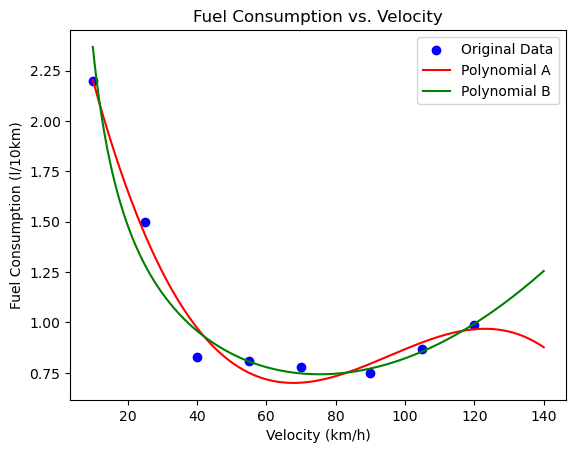

In [118]:
# Create a scatter plot
plt.scatter(original_velocity, original_fuel, color='blue', label='Original Data')

# Plot the polynomial lines
plt.plot(velocity_range, fuel_consumption_a, color='red', label='Polynomial A')
plt.plot(velocity_range, fuel_consumption_b, color='green', label='Polynomial B')

# Show the updated plot with the polynomial lines
plt.legend()

# Add labels and title
plt.xlabel('Velocity (km/h)')
plt.ylabel('Fuel Consumption (l/10km)')
plt.title('Fuel Consumption vs. Velocity')
plt.legend()

# Show the plot
plt.show()

# d) 

In [139]:
# Calculate the predicted values for both models
predicted_a = polynomial_function_a(coefficients_a, original_velocity)
predicted_b = polynomial_function_b(coefficients_b, original_velocity)

# Calculate the residuals for both models
residuals_a = y_a.flatten() - predicted_a
residuals_b = y_a.flatten() - predicted_b

# Compute the norm of the residuals
residual_norm_a = np.linalg.norm(residuals_a)**2
residual_norm_b = np.linalg.norm(residuals_b)**2

print(f'Residual norm of model A: {residual_norm_a}')
print(f'Residual norm of model B: {residual_norm_b}')

Residual norm of model A: 0.03809110217541794
Residual norm of model B: 0.09206066763037121


# e)

In [142]:
# Define the data as a dictionary of dictionaries
routes = {
    'A': {'B': {'speed_limit': 80, 'distance': 60}, 
          'C': {'speed_limit': 110, 'distance': 100}},
    'B': {'C': {'speed_limit': 80, 'distance': 50},
          'D': {'speed_limit': 70, 'distance': 100}},
    'C': {'D': {'speed_limit': 90, 'distance': 40}}
}

# Calculate travel time for each option
for start, destinations in routes.items():
    for end, data in destinations.items():
        speed_limit = data['speed_limit']
        distance = data['distance']
        travel_time_hours = distance / speed_limit  # Time in hours
        travel_time_minutes = travel_time_hours * 60  # Time in minutes
        print(f"{start} -> {end}: {travel_time_hours:.2f} hours ({travel_time_minutes:.2f} minutes)")

A -> B: 0.75 hours (45.00 minutes)
A -> C: 0.91 hours (54.55 minutes)
B -> C: 0.62 hours (37.50 minutes)
B -> D: 1.43 hours (85.71 minutes)
C -> D: 0.44 hours (26.67 minutes)


In [144]:
# Define a function to calculate fuel consumption for a given distance and speed limit
def calculate_fuel_consumption(coefficients, speed_limit, distance):
    fuel_consumption_per_10km = polynomial_function_a(coefficients, speed_limit)
    fuel_consumption = (distance / 10) * fuel_consumption_per_10km
    return fuel_consumption.item()

# Calculate fuel consumption for each route
for start, destinations in routes.items():
    for end, data in destinations.items():
        speed_limit = data['speed_limit']
        distance = data['distance']
        fuel_consumption = calculate_fuel_consumption(coefficients_a, speed_limit, distance)
        print(f"{start} -> {end}: {fuel_consumption:.2f} liters")

A -> B: 4.40 liters
A -> C: 9.31 liters
B -> C: 3.67 liters
B -> D: 7.01 liters
C -> D: 3.18 liters


In [145]:
# Define the distance matrix for travel time
distance_matrix = np.array([
    [0, 0.75, 0.91, 0],
    [0, 0, 0.62, 1.43],
    [0, 0, 0, 0.44],
    [0, 0, 0, 0]
])

print(distance_matrix)

[[0.   0.75 0.91 0.  ]
 [0.   0.   0.62 1.43]
 [0.   0.   0.   0.44]
 [0.   0.   0.   0.  ]]


In [146]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

In [151]:
# Add edges to the graph
nodes = ['A', 'B', 'C', 'D']
for i, start in enumerate(nodes):
    for j, end in enumerate(nodes):
        if distance_matrix[i, j] > 0:
            G.add_edge(start, end, weight=distance_matrix[i, j])

# Use Dijkstra's algorithm to find the shortest path from node 'A' to 'D'
start_node = 'A'
end_node = 'D'
length, path = nx.single_source_dijkstra(G, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {path}")
print(f"Total travel time: {length:.2f} hours")

Shortest path from A to D: ['A', 'C', 'D']
Total travel time: 1.35 hours


In [152]:
# Initialize the distance matrix for fuel consumption
fuel_consumption_matrix = np.zeros((4, 4))

# Populate the matrix using the routes data
nodes = ['A', 'B', 'C', 'D']
for i, start in enumerate(nodes):
    for j, end in enumerate(nodes):
        if start in routes and end in routes[start]:
            data = routes[start][end]
            speed_limit = data['speed_limit']
            distance = data['distance']
            fuel_consumption_matrix[i, j] = calculate_fuel_consumption(coefficients_a, speed_limit, distance)

print(fuel_consumption_matrix)

[[0.    4.401 9.309 0.   ]
 [0.    0.    3.667 7.013]
 [0.    0.    0.    3.181]
 [0.    0.    0.    0.   ]]


In [157]:
# Create a directed graph
H = nx.DiGraph()

# Add edges to the graph
nodes = ['A', 'B', 'C', 'D']
for i, start in enumerate(nodes):
    for j, end in enumerate(nodes):
        if fuel_consumption_matrix[i, j] > 0:
            H.add_edge(start, end, weight=fuel_consumption_matrix[i, j])

# Use Dijkstra's algorithm to find the most fuel efficient path from node 'A' to 'D'
start_node = 'A'
end_node = 'D'
length, path = nx.single_source_dijkstra(H, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {path}")
print(f"Total fuel: {length:.2f} liters")

Shortest path from A to D: ['A', 'B', 'C', 'D']
Total fuel: 11.25 liters
